### First 99.

In [90]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [91]:
df = pd.read_csv("train.csv")
column_name = pd.read_csv("data_info.csv")

In [93]:
df.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


### 범주형 -> 수치화

In [94]:
df['preferred_difficulty_level'].value_counts()

preferred_difficulty_level
Low       4992
Medium    3008
High      2000
Name: count, dtype: int64

In [95]:
df['subscription_type'].value_counts()

subscription_type
Basic      5979
Premium    4021
Name: count, dtype: int64

In [96]:
from sklearn.preprocessing import OrdinalEncoder
def categoryChange(df):
    """ 카테고리화 """
    ordinal_encoder = OrdinalEncoder()
    ordinal = ordinal_encoder.fit_transform(df)
    return ordinal

In [97]:
for category in ['preferred_difficulty_level','subscription_type']:
    df.loc[:,category] = categoryChange(df[[category]])
    df[category] = pd.to_numeric(df[category])

In [17]:
df.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,1.0,0.0,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,2.0,0.0,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,2.0,1.0,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,1.0,0.0,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,2.0,0.0,3,0,1


### 수치형 분포 확인

In [98]:
numeric = ['subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 
       'customer_inquiry_history', 'payment_pattern']

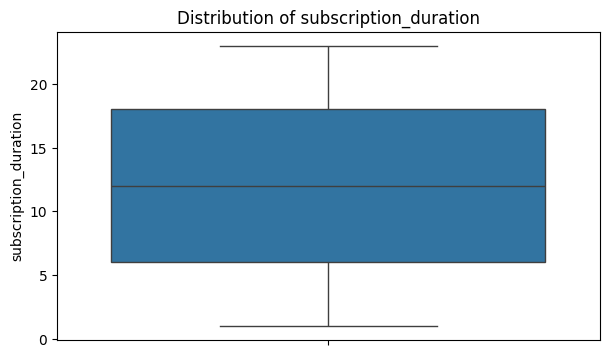

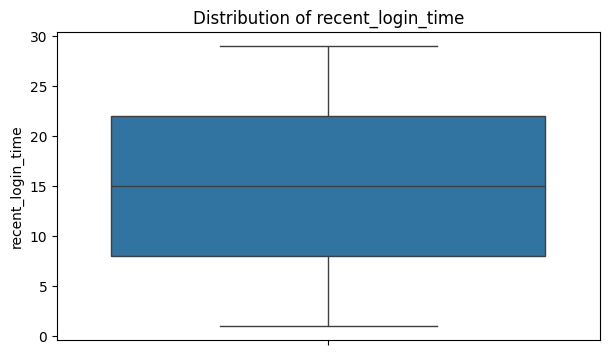

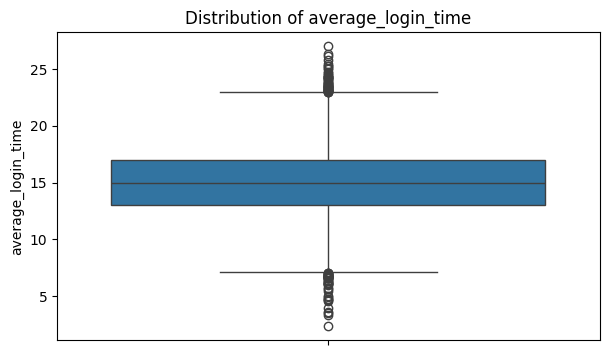

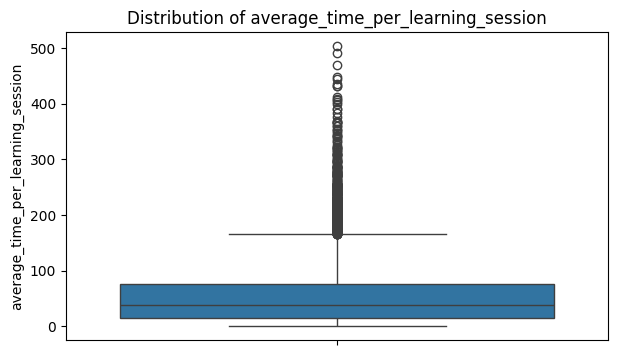

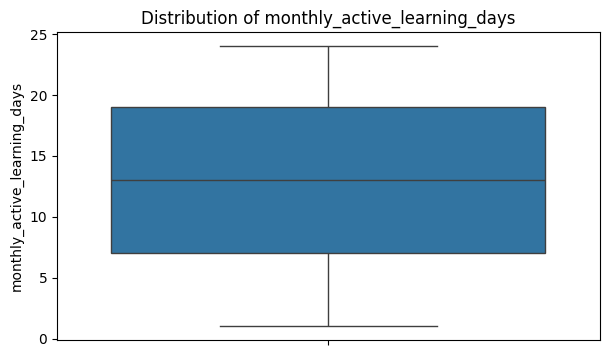

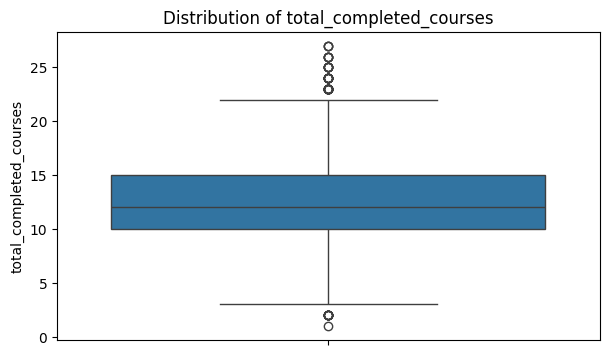

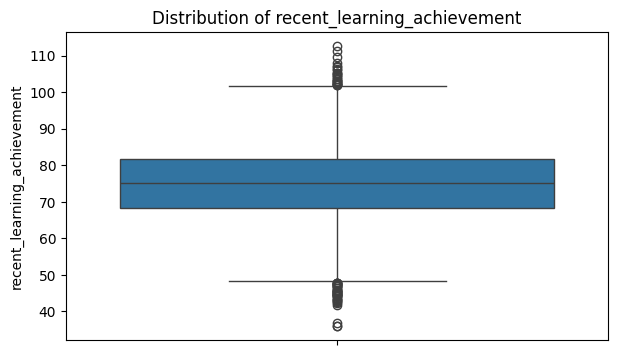

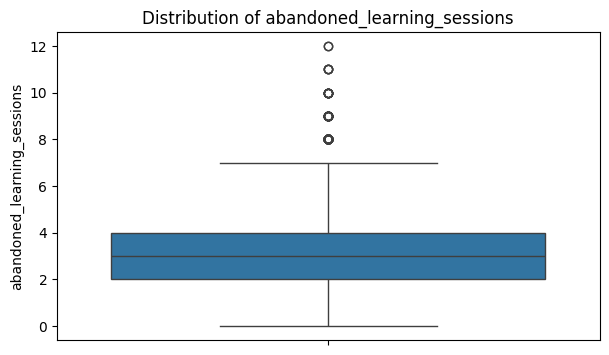

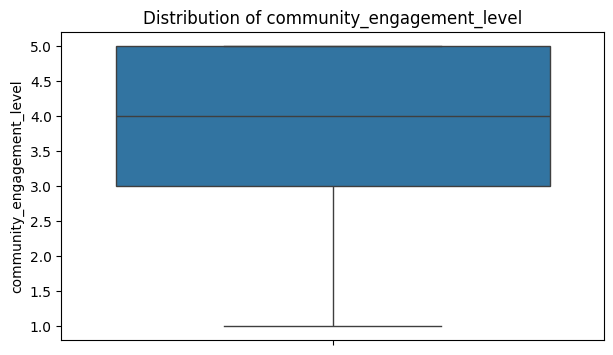

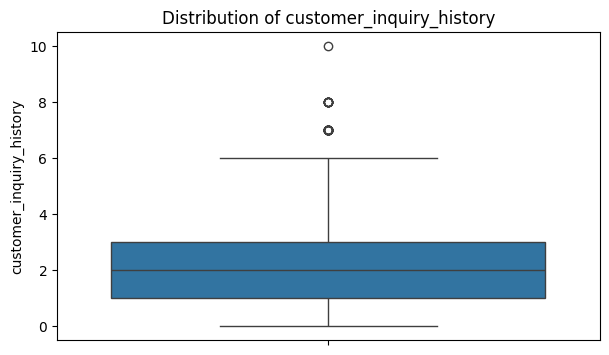

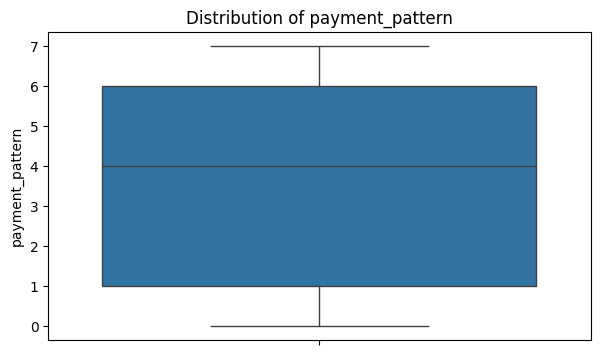

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for column in numeric:
    plt.figure(figsize=(7, 4))
    # sns.distplot(df[column], bins=10, kde=True, hist=True)
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [43]:
for j in ["average_time_per_learning_session","abandoned_learning_sessions","customer_inquiry_history"]:
    print(df[j].describe())

count    10000.000000
mean        54.917720
std         56.024310
min          0.011515
25%         15.276611
50%         37.578818
75%         75.584200
max        503.372616
Name: average_time_per_learning_session, dtype: float64
count    10000.000000
mean         3.043600
std          1.755052
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: abandoned_learning_sessions, dtype: float64
count    10000.000000
mean         2.010500
std          1.420983
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: customer_inquiry_history, dtype: float64
count    10000.000000
mean        12.227500
std          3.634125
min          1.000000
25%         10.000000
50%         12.000000
75%         15.000000
max         27.000000
Name: total_completed_courses, dtype: float64


## log 변환

- skew된 데이터만

In [99]:
import numpy as np
for feature in ["average_time_per_learning_session","abandoned_learning_sessions","customer_inquiry_history"]:
    if (df[feature] > 0).all():
        df[feature] = np.log(df[feature])

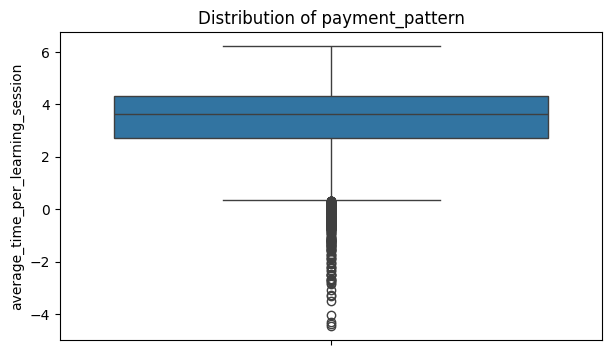

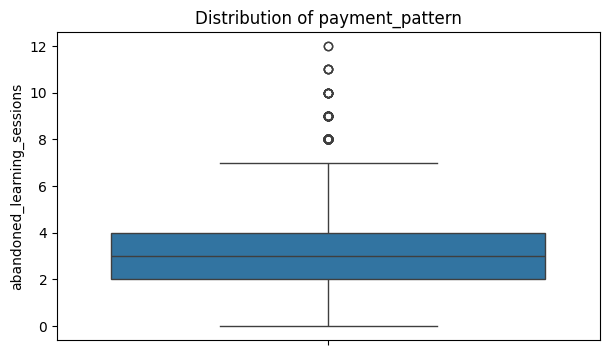

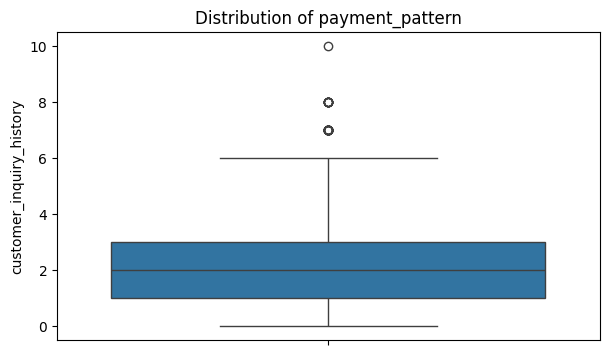

In [49]:
for j in ["average_time_per_learning_session","abandoned_learning_sessions","customer_inquiry_history"]:
    plt.figure(figsize=(7, 4))
    # sns.distplot(df[j], bins=10, kde=True, hist=True)
    sns.boxplot(df[j])
    plt.title(f'Distribution of {column}')
    plt.show()

In [50]:
df.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,2.131463,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,4.285600,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,3.080739,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,3.753240,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,3.425704,19,10,81.917908,2,4,Medium,Basic,3,0,1


## StandardScaler
- 로그 변환 데이터 빼고

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scale_col = ['subscription_duration',
 'recent_login_time',
 'average_login_time',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'community_engagement_level',
 'payment_pattern']

In [102]:
scaler = StandardScaler() #skew가 높은 것을 제외한 것들 정규화
df[scale_col] = scaler.fit_transform(df[scale_col])

## Modeling

In [103]:
df.drop(['user_id'],inplace = True, axis = 1)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [105]:
X = df.drop(['target'], axis = 1)
Y = df[['target']]

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [107]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000, 1), (2000, 1))

In [108]:
model = XGBClassifier()

In [109]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
y_pred = model.predict(x_test)

In [112]:
f1_score(y_test,y_pred)

0.6775956284153005

## predict & submit

In [119]:
df = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [120]:
# 범주형 -> 수치화
for category in ['preferred_difficulty_level','subscription_type']:
    df.loc[:,category] = categoryChange(df[[category]])
    df[category] = pd.to_numeric(df[category])

In [121]:
# 수치화 로그 변환
for feature in ["average_time_per_learning_session","abandoned_learning_sessions","customer_inquiry_history"]:
    if (df[feature] > 0).all():
        df[feature] = np.log(df[feature])

In [122]:
# 스케일 변환
scaler = StandardScaler() #skew가 높은 것을 제외한 것들 정규화
df[scale_col] = scaler.fit_transform(df[scale_col])

In [123]:
df.drop(['user_id'],inplace = True, axis = 1)

In [125]:
y_pred = model.predict(df)

In [126]:
submission['target'] = y_pred

In [127]:
submission.to_csv("submission.csv",index = False)